Resource:
- [Nicholas Renotte](https://www.youtube.com/watch?v=AALBGpLbj6Q&t=2875s)
- [Simplilearn](https://www.youtube.com/watch?v=8uC-WT1LYnU&t=1721s)

In [1]:
import tensorflow as tf
!nvidia-smi

Sun Feb 12 03:47:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [6]:
ds = tfds.load(name="fashion_mnist", split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete52I1TW/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete52I1TW/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [9]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

# Visualize data and build dataset

In [11]:
# untuk transformasi data
import numpy as np

In [12]:
# setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [13]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

(28, 28, 1)
(28, 28)
(28, 28, 1)
(28, 28)
(28, 28, 1)
(28, 28)
(28, 28, 1)
(28, 28)


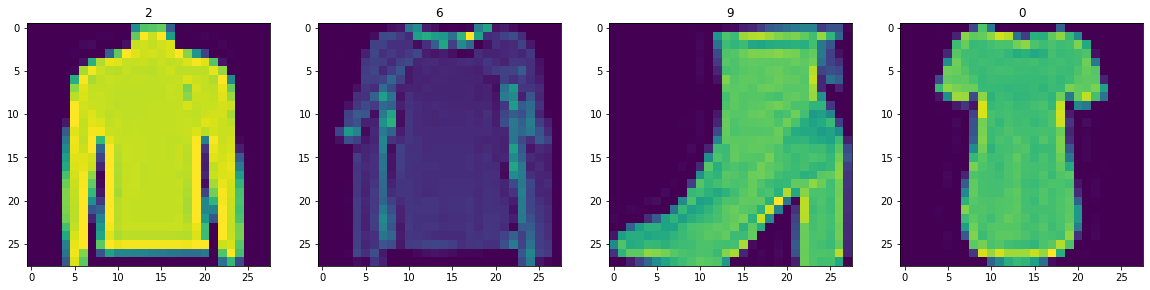

In [20]:
# setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    batch = dataiterator.next()
    print(batch["image"].shape)
    print(np.squeeze(batch["image"]).shape)
    ax[idx].imshow(np.squeeze(batch["image"]))
    ax[idx].title.set_text(batch["label"])

In [15]:
def scale_images(data):
    image = data["image"]
    return image / 255

In [16]:
ds = tfds.load("fashion_mnist", split="train")
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(batch_size=128)
ds = ds.prefetch(64)

In [18]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network

In [24]:
# Import Modelling Components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [27]:
# Build Generator
def build_generator():
    model = Sequential([
        # Takes in ranfom values and reshapes it to 7x7x128
        # Beginnings of a generated image
        Dense(7*7*128, input_dim=128),
        LeakyReLU(alpha=0.2),
        Reshape(target_shape=(7,7,128))

        # Upsampling block 1
        UpSampling2D(),
        Conv2D(128, 5, padding="same"),
        LeakyReLU(0.2)
    ])

    return model

In [28]:
test_model = build_generator()

In [29]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
Total params: 809,088
Trainable params: 809,088
Non-trainable params: 0
_________________________________________________________________


# Keras Sequential Model

In [35]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [43]:
DIR = r"archive\flowers"

X = []
Z = []
IMAGE_SIZE = 150
FLOWER_DAISY_DIR = DIR + "\daisy"
FLOWER_SUNFLOWER_DIR = DIR + "\sunflower"
FLOWER_TULIP_DIR = DIR + "\tulip"
FLOWER_DANDI_DIR = DIR + "\dandi"
FLOWER_ROSE_DIR = DIR + "\rose"

In [41]:
FLOWER_DAISY_DIR

'archive\\flowers\\daisy'

In [45]:
def assign_label(img, flower_type):
    return flower_type

def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [46]:
make_train_data('daisy', FLOWER_DAISY_DIR)

FileNotFoundError: ignored